# Regularization & Optimization

In [ ]:
import tensorflow as tf

from matplotlib import pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist

X_train = X_train / 255
X_test = X_test / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Image Size: ", X_train[0].shape)
print("Size of tarining set", len(X_train))
print("Size of testing set", len(X_test))


Image Size:  (28, 28)
Size of tarining set 60000
Size of testing set 10000


In [ ]:
# Flatten images (28x28 → 784)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
# Baseline Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

# some constants for settings
_epochs = 40
_batch_size = 32
_lr = 0.001


# Build small model
# just to see the effects of regularization on a small model vs medium, large
model_small = Sequential([
    Input(shape=(X_train.shape[1],)),      # Explicit input layer
    Dense(128, activation='relu'), # 128 to 10 isn't that big of a jump, Tariq says, it'd only be concerning if it was in the 1000s
    Dense(10, activation='softmax')
])

# Build medium model
model_medium = Sequential([
    Input(shape=(X_train.shape[1],)),      # Explicit input layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# # Build large model
# model_large = Sequential([
#     Input(shape=(X_train.shape[1],)),      # Explicit input layer
#     Dense(4096, activation='relu'),
#     Dense(2048, activation='relu'),
#     Dense(1024, activation='relu'),
#     Dense(512, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model_small.compile(optimizer=Adam(learning_rate=_lr),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy', 'accuracy'])

model_medium.compile(optimizer=Adam(learning_rate=_lr),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy', 'accuracy'])

# model_large.compile(optimizer=Adam(learning_rate=_lr),
#               loss='sparse_categorical_crossentropy',
#               metrics=['sparse_categorical_crossentropy', 'accuracy'])

In [ ]:
model_small.summary()

In [ ]:
def plot_histories(histories, names, measure,
                   xlim_max=40,ylim_min=0,ylim_max=0):

    measure_to_pretty = {'sparse_categorical_crossentropy': 'loss',
                         'accuracy': 'accuracy'}
    nb_histories = len(histories)
    fig = plt.figure(figsize=plt.figaspect(0.05 * nb_histories))

    for i in range(nb_histories):
        ax = fig.add_subplot(1, nb_histories, i + 1)
        ax.plot(histories[i].history[f'val_{measure}'],
                label=f'Test {measure_to_pretty[measure]}, {names[i]}')
        plt.xlabel('Epoch')
        plt.ylabel(measure)
        plt.legend()
        plt.xlim(0,xlim_max)
        plt.ylim(ylim_min,ylim_max)
        #plt.gca().set_aspect('equal', adjustable='box')
        plt.draw()


    plt.show()

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
history_small = model_small.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=40, verbose=1)
history_medium = model_medium.fit(X_train, y_train,
                                  validation_data=(X_test, y_test),
                                  epochs=40, verbose=1)
# history_large = model_large.fit(X_train, y_train,
#                                 validation_data=(X_test, y_test),
#                                 epochs=40, verbose=0)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9713 - loss: 0.0769 - sparse_categorical_crossentropy: 0.0769 - val_accuracy: 0.8861 - val_loss: 0.6072 - val_sparse_categorical_crossentropy: 0.6072
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9713 - loss: 0.0743 - sparse_categorical_crossentropy: 0.0743 - val_accuracy: 0.8869 - val_loss: 0.6223 - val_sparse_categorical_crossentropy: 0.6223
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.0750 - sparse_categorical_crossentropy: 0.0750 - val_accuracy: 0.8835 - val_loss: 0.6270 - val_sparse_categorical_crossentropy: 0.6270
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0701 - sparse_categorical_crossentropy: 0.0701 - val_accuracy: 0.8762 - val_loss: 0.6256 - val_sparse_categorical_crossentropy: 0.6256
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9713 - loss: 0.0766 - sparse_categorical_crossentropy: 0.076

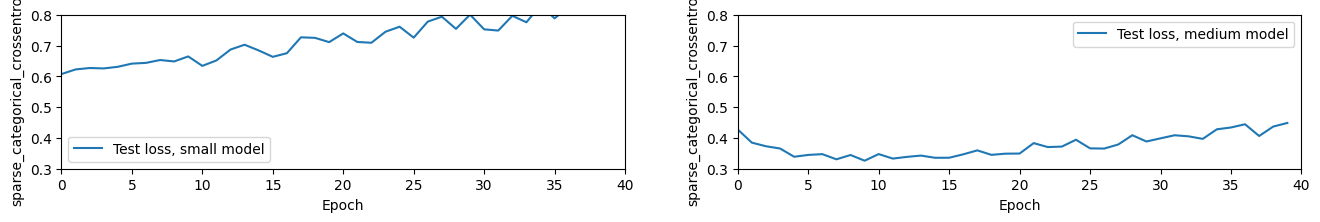

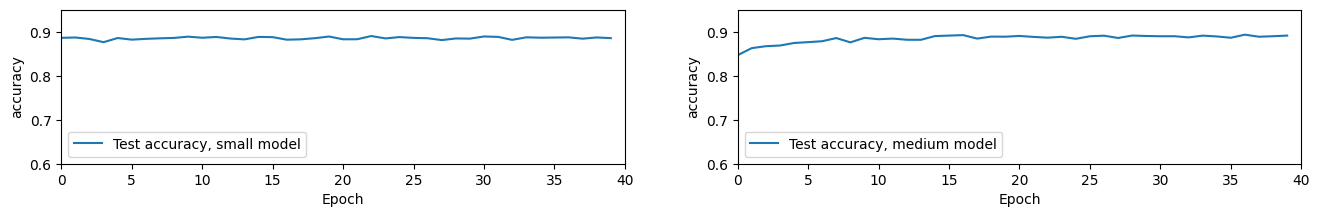

In [ ]:
plot_histories(histories=[history_small, history_medium],
               names=['small model', 'medium model'],
               measure='sparse_categorical_crossentropy',
               xlim_max=40,ylim_min=0.3,ylim_max=0.8)
plot_histories(histories=[history_small, history_medium],
               names=['small model', 'medium model'],
               measure='accuracy', xlim_max=40,ylim_min=0.6,ylim_max=0.95)

## Observation

Results are steady, could use early stopping

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7848 - loss: 0.6200 - sparse_categorical_crossentropy: 0.6200 - val_accuracy: 0.8323 - val_loss: 0.4631 - val_sparse_categorical_crossentropy: 0.4631
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.3916 - sparse_categorical_crossentropy: 0.3916 - val_accuracy: 0.8475 - val_loss: 0.4154 - val_sparse_categorical_crossentropy: 0.4154
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.3341 - sparse_categorical_crossentropy: 0.3341 - val_accuracy: 0.8701 - val_loss: 0.3590 - val_sparse_categorical_crossentropy: 0.3590
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8832 - loss: 0.3142 - sparse_categorical_crossentropy: 0.3142 - val_accuracy: 0.8696 - val_loss: 0.3615 - val_sparse_categorical_crossentropy: 0.3615
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8917 - loss: 0.2936 - sparse_categorical_crossentropy: 0.293

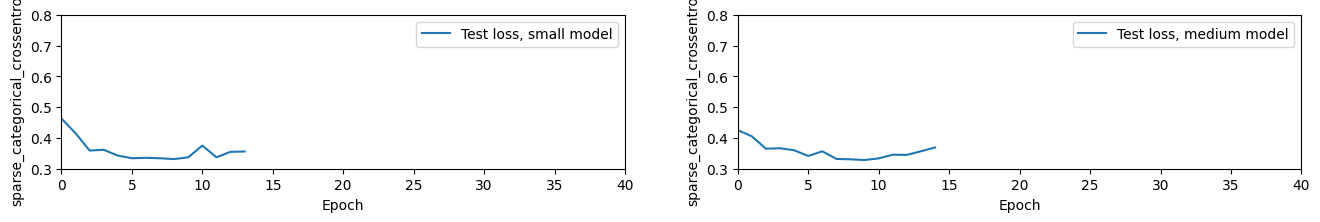

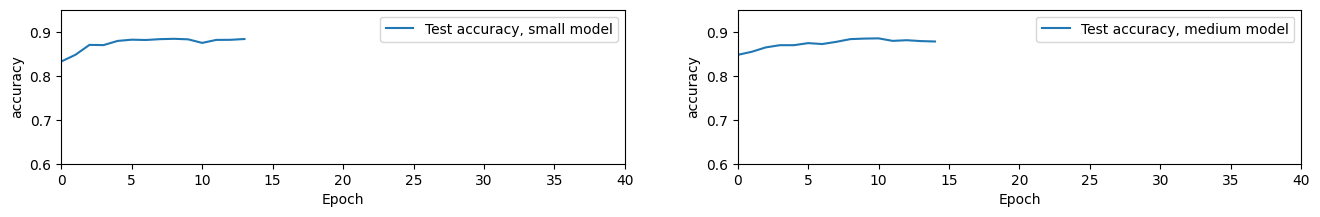

In [ ]:
# Add early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping1 = EarlyStopping(
    min_delta=0.001, # minimium amount of change
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

early_stopping2 = EarlyStopping(
    min_delta=0.001, # minimium amount of change
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

_epochs = 40
_batch_size = 32
_lr = 0.001


# Build small model
model_small = Sequential([
    Input(shape=(X_train.shape[1],)),      # Explicit input layer
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Build medium model
model_medium = Sequential([
    Input(shape=(X_train.shape[1],)),      # Explicit input layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])



model_small.compile(optimizer=Adam(learning_rate=_lr),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy', 'accuracy'])

model_medium.compile(optimizer=Adam(learning_rate=_lr),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy', 'accuracy'])

history_small = model_small.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                callbacks=[early_stopping1],
                                epochs=40, verbose=1)
history_medium = model_medium.fit(X_train, y_train,
                                  validation_data=(X_test, y_test),
                                  callbacks=[early_stopping2],
                                  epochs=40, verbose=1)


plot_histories(histories=[history_small, history_medium],
               names=['small model', 'medium model'],
               measure='sparse_categorical_crossentropy',
               xlim_max=40,ylim_min=0.3,ylim_max=0.8)
plot_histories(histories=[history_small, history_medium],
               names=['small model', 'medium model'],
               measure='accuracy', xlim_max=40,ylim_min=0.6,ylim_max=0.95)

# HOMEWORK

Experiment with different values

In [ ]:
# Add L1/L2 Norm
# Dense(4096, activation='relu', tf.keras.regularizers.l2(0.001)),

In [ ]:
# Add Dropout
# Dropout(0.2)

In [ ]:
# Add Batchnormalization
# BatchNormalization()